<a href="https://colab.research.google.com/github/EstherTiclla/Quimica_G3/blob/main/TICLLA_Quimica_Actividad_S13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calcular la entalpia, la entalpía es la cantidad de energía que un sistema termodinámico intercambia con su medio ambiente

In [ ]:
!pip install pandas
!pip install rdkit
!pip install pyscf

In [ ]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem import MolFromSmiles
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

#Visualizacion de moleculas (SMILES)
from rdkit.Chem import MolFromSmiles
from rdkit.Chem import Draw

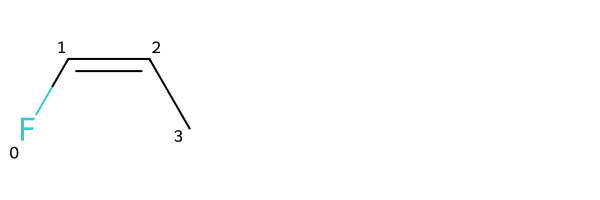

In [ ]:
#SMILES
cis = "F\C=C/C"
trans = "F/C=C/C"

#Convertir a molecula RDKit
cis_mol = Chem.MolFromSmiles(cis)
trans_mol = Chem.MolFromSmiles(trans)

#Dibujar la estructura
Draw.MolsToGridImage([cis_mol])

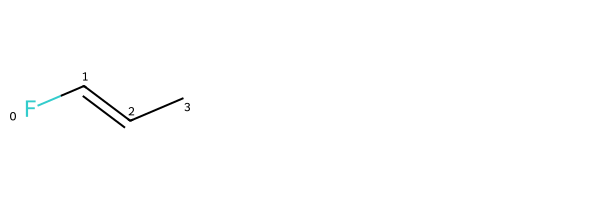

In [ ]:
Draw.MolsToGridImage([trans_mol])

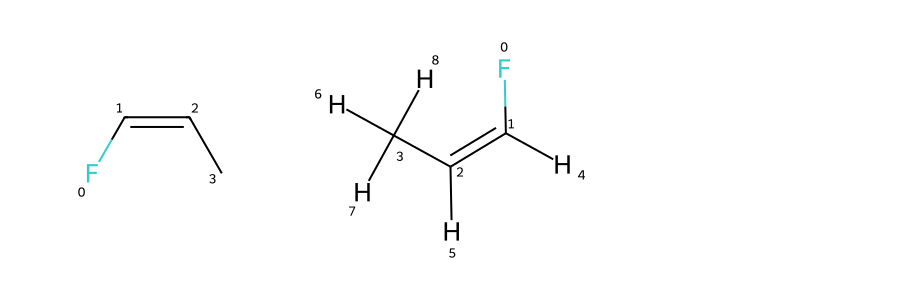

In [ ]:
#Añadir hidrogenos
cis_mol_h = Chem.AddHs(cis_mol)
trans_mol_h = Chem.AddHs(trans_mol)

#Mostrar estructuras
Draw.MolsToGridImage([cis_mol, cis_mol_h], subImgSize=(300,300))

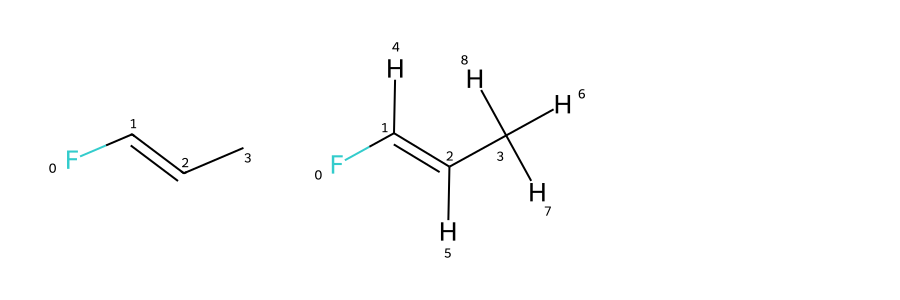

In [ ]:
Draw.MolsToGridImage([trans_mol, trans_mol_h], subImgSize=(300,300))

In [ ]:
# The current molecule has z = 0 for all atoms
# This is a 2D molecule
print(Chem.MolToMolBlock(cis_mol_h))
print(Chem.MolToMolBlock(trans_mol_h))


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    1.9027    0.2590    1.3354 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.3740    0.0517    0.0975 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1853   -0.5411   -0.0256 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0852    0.2087   -0.0469 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8722    0.3463   -0.8220 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.1358   -1.6180   -0.1146 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6118    0.0532    0.9126 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7734   -0.2283   -0.8288 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9177    1.2625   -0.3059 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    2.5486   -0.1067    0.1969 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.3076    0.2723   -0.1597 C   0  0  0  0  0  0  0  0 

In [ ]:
# Let us make it 3D by generating a random conformer
Chem.AllChem.EmbedMolecule(cis_mol_h)
Chem.AllChem.EmbedMolecule(trans_mol_h)

# look at the molecule again
print(Chem.MolToMolBlock(cis_mol_h))
print(Chem.MolToMolBlock(trans_mol_h))

In [ ]:
Chem.MolToXYZFile(cis_mol_h,"cis.xyz")
Chem.MolToXYZFile(trans_mol_h,"trans.xyz")

In [ ]:
from pyscf import gto, scf

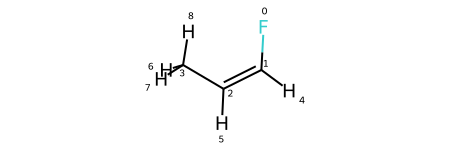

In [ ]:
Chem.AllChem.EmbedMolecule(cis_mol_h)
cis_mol_h

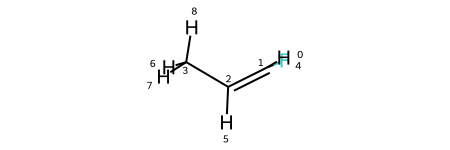

In [ ]:
# set the value to 90 for the conformer
Chem.AllChem.SetDihedralDeg(cis_mol_h.GetConformer(0),3,2,1,0,90.0)

# save the new conformer
Chem.MolToXYZFile(cis_mol_h, "cis_90.xyz")

# Looks like it is set to 90
cis_mol_h

In [ ]:
para_cis_90 = gto.M(atom="cis_90.xyz")
para_cis_90.basis = "3-21G"
mf = para_cis_90.KS()
mf.xc = 'b3lyp'

In [ ]:
energia_cis_90 = mf.kernel()

converged SCF energy = -214.084928170671


In [ ]:
para_trans = gto.M(atom="trans.xyz")
para_trans.basis = "3-21G"
mf1 = para_trans.KS()
mf1.xc = 'b3lyp'

In [ ]:
energia_trans = mf1.kernel()

converged SCF energy = -214.251852671681


In [ ]:
entalpia=energia_cis_90-energia_trans
print(entalpia)

0.16692450100978817


In [ ]:
#Determinar si es exo o endo
if entalpia > 0:
  print("Es reacción endotermica")
else:
  print("Es reacción exotermica")

Es reacción endotermica
